In [23]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import matplotlib as mpl
mpl.style.use('default')
from matplotlib import colors

In [2]:
dpi = 70

D = 3 
N = 1e8
resdir = 'nsc-tuesday' #'nsc-s1' # 'nsc-s1Ne7'
s = 1.0
L = 1.0
n_perms = 5
m = 2/3

In [3]:
true_n = 10
code_n = round((true_n-2*m)/(1-m))
randix = 0

plot_colors = ['gold', 'lightgreen', 'cornflowerblue']
plot_scs = [0.5, 0.7, 0.99]

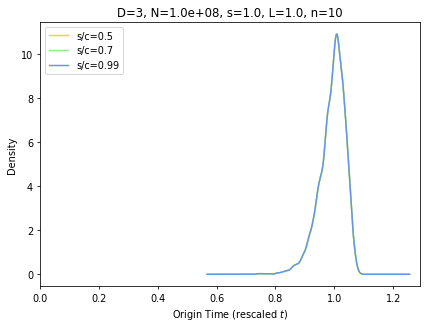

In [4]:
fig = plt.figure(figsize=(7,5), dpi=dpi)
for sc,color in zip(plot_scs, plot_colors):
    c = s / sc
    fout = (
        f"{resdir}/D={D}_n={float(code_n)}_N={N:.2e}_s={s:.1f}_"
        f"L={L:.1f}_c={c:.5e}_r={randix}.csv"
    )
    a = pd.read_csv(fout)
    ax = (a.OriginTime / a.OriginTime.median()).plot.kde(bw_method=0.15, c=color)
ax.set_xlabel('Origin Time (rescaled $t$)')
ax.legend([f's/c={psc:.2}' for psc in plot_scs])
ax.set_xlim(0, ax.get_xlim()[1])
ax.set_title(f'D={D}, N={N:.1e}, s={s}, L={L}, n={true_n}');
fig.savefig(f'figures-{resdir}/univariate-s-OriginTime.png');

2.0
1.4285714285714286
1.0101010101010102


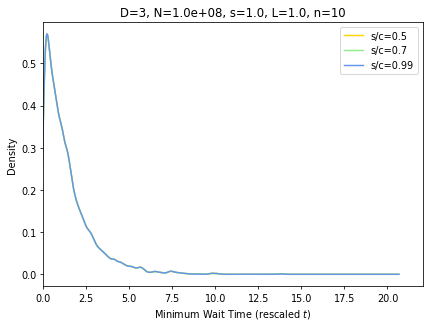

In [5]:
fig = plt.figure(figsize=(7,5), dpi=dpi)
for sc,color in zip(plot_scs, plot_colors):
    c = s / sc
    fout = (
        f"{resdir}/D={D}_n={float(code_n)}_N={N:.2e}_s={s:.1f}_"
        f"L={L:.1f}_c={c:.5e}_r={randix}.csv"
    )
    print(c)
    a = pd.read_csv(fout)
    a['MinWait'] = 0.5* (a.MinArrival - a.OriginTime)
    ax = (a.MinWait / a.MinWait.median()).plot.kde(bw_method=0.1, c=color)
ax.set_xlabel('Minimum Wait Time (rescaled $t$)')
ax.legend([f's/c={psc:.2}' for psc in plot_scs])
ax.set_xlim(0, ax.get_xlim()[1])
ax.set_title(f'D={D}, N={N:.1e}, s={s}, L={L}, n={true_n}');
fig.savefig(f'figures-{resdir}/univariate-s-MinWait.png');

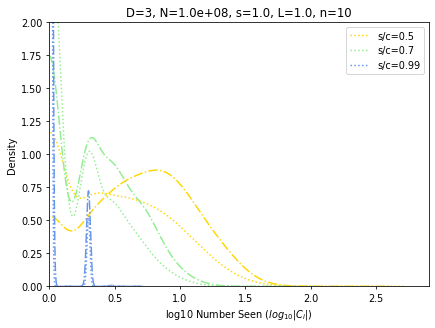

In [18]:
fig = plt.figure(figsize=(7,5), dpi=dpi)
for nn,lfmt in [(2, ':'), (10, '-.')]:
    mycode_n = round((nn-2*m)/(1-m))
    for sc,color in zip(plot_scs, plot_colors):
        c = s / sc
        fout = (
            f"{resdir}/D={D}_n={float(mycode_n)}_N={N:.2e}_s={s:.1f}_"
            f"L={L:.1f}_c={c:.5e}_r={randix}.csv"
        )
        a = pd.read_csv(fout)
        ax = np.log10(a.NumberSeen+1).plot.kde(bw_method=0.3, linestyle=lfmt, c=color)
    ax.set_xlabel('log10 Number Seen ($log_{10} |C_i+1|$)')
    ax.legend([f's/c={psc:.2}' for psc in plot_scs])
    ax.set_ylim(0, 2)
    ax.legend([f's/c={psc:.2}' for psc in plot_scs])
    ax.set_xlim(0, ax.get_xlim()[1])
    ax.set_title(f'D={D}, N={N:.1e}, s={s}, L={L}, n={true_n}');
    fig.savefig(f'figures-{resdir}/univariate-s-NumberSeen.png');

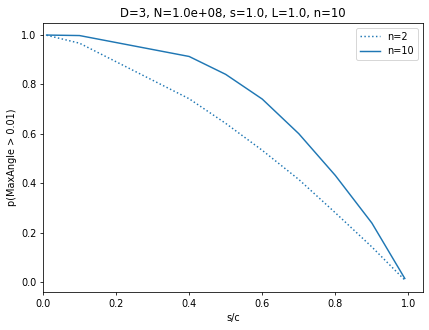

In [72]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,5), dpi=dpi)
res_df = pd.DataFrame()
for nn,lfmt in [(2, '-'), (10, '--')]:
    mycode_n = round((nn-2*m)/(1-m))
    myres = []
    mysc_list = [0.01, 0.1, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]
    for sc in mysc_list:
        c = s / sc
        fout = (
            f"{resdir}/D={D}_n={float(mycode_n)}_N={N:.2e}_s={s:.1f}_"
            f"L={L:.1f}_c={c:.5e}_r={randix}.csv"
        )
        a = pd.read_csv(fout)
        myres.append((a.MaxAngle > 0.01).mean())
    res_df[f'n={nn}'] = pd.Series(data=np.array(myres),index=mysc_list)
res_df.plot(ax=ax)
ax.set_xlabel('log10 Number Seen ($log_{10} |C_i|$)')
ax.set_ylabel('p(MaxAngle > 0.01)')
#ax.get_legend().remove()
ax.set_xlabel('s/c')
ax.set_xlim(0, ax.get_xlim()[1])
ax.get_lines()[0].set_linestyle(':')
ax.get_lines()[1].set_color(ax.get_lines()[0].get_color())
ax.set_title(f'D={D}, N={N:.1e}, s={s}, L={L}, n={true_n}');
ax.legend()
fig.savefig(f'figures-{resdir}/univariate-s-pMaxAngle.png');

<Figure size 490x350 with 0 Axes>

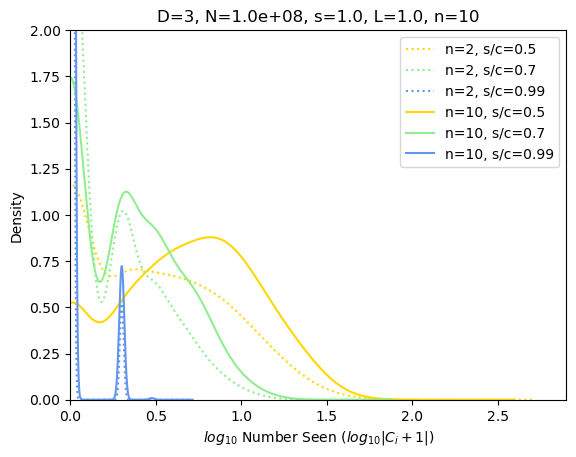

In [77]:
fig = plt.figure(figsize=(7,5), dpi=dpi)
res_df = pd.DataFrame()
col_dict = {}
lstyle_dict = {}
for nn,lfmt in [(2, '-'), (10, '--')]:
    mycode_n = round((nn-2*m)/(1-m))
    for sc,color in zip(plot_scs, plot_colors):
        c = s / sc
        fout = (
            f"{resdir}/D={D}_n={float(mycode_n)}_N={N:.2e}_s={s:.1f}_"
            f"L={L:.1f}_c={c:.5e}_r={randix}.csv"
        )
        a = pd.read_csv(fout)
        res_df[f'n={nn}, s/c={sc:.2}'] = np.log10(a.NumberSeen+1)
        col_dict[f'n={nn}, s/c={sc:.2}'] = colors.to_rgb(color)
        lstyle_dict[f'n={nn}, s/c={sc:.2}'] = lfmt
ax = res_df.plot.kde(bw_method=0.3,  color=col_dict)
ax.set_xlabel('$log_{10}$ Number Seen ($log_{10} |C_i+1|$)')
#ax.legend([f's/c={psc:.2}' for psc in plot_scs])
ax.set_ylim(0, 2)
#ax.legend([f's/c={psc:.2}' for psc in plot_scs])
ax.set_xlim(0, ax.get_xlim()[1])
ax.set_title(f'D={D}, N={N:.1e}, s={s}, L={L}, n={true_n}');
for line in ax.get_lines()[0:3]:
    line.set_linestyle(':')
ax.legend()
plt.gcf().savefig(f'figures-{resdir}/univariate-s-NumberSeen-2.png');

In [52]:
res_df

,"n=2, s/c=0.5","n=2, s/c=0.7","n=2, s/c=0.99","n=10, s/c=0.5","n=10, s/c=0.7","n=10, s/c=0.99"
0,0.000000,0.000000,0.00000,0.0,0.0,0.0
1,0.000000,0.000000,0.00000,0.0,0.0,0.0
2,0.000000,0.000000,0.00000,0.0,0.0,0.0
3,0.000000,0.000000,0.00000,0.0,0.0,0.0
4,0.000000,0.000000,0.00000,0.0,0.0,0.0
...,...,...,...,...,...,...
19674,1.633468,0.954243,0.00000,NaN,NaN,NaN
19675,1.591065,1.146128,0.00000,NaN,NaN,NaN
19676,1.748188,1.278754,0.30103,NaN,NaN,NaN
19677,1.732394,1.301030,0.00000,NaN,NaN,NaN


In [61]:
res_df

,"n=2, s/c=0.9","n=10, s/c=0.9"
0.01,0.998679,0.999336
0.10,0.966411,0.997344
0.40,0.741654,0.912683
0.50,0.642055,0.840305
0.60,0.533106,0.740372
0.70,0.415062,0.600266
0.80,0.280350,0.431275
0.90,0.142080,0.238712


In [75]:
fig.savefig('asdf.png')